# Car Prices - Linear Regression

We will be building a linear regression model to understand the drivers which influence car prices. 

The dataset contains the following data points about car prices:

- 1 Car_Name - the model of the car
- 2 Year - the year of the car
- 3 Selling_Price - the current selling price of the used car
- 4 Present_Price - the price of the same car, but new
- 5 Kms_Driven - how many kms have been driven
- 6 Fuel_Type - diesel or gas
- 7 Seller_Type - sold by a dealer or individual seller
- 8 Transmission - standard or automatic
- 9 Owner - number of owners

## Data preparation

- First explore data and then create dummy variables for the Fuel_Type, Transmission and Seller_Type variables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [3]:
cars = pd.read_csv('car_data.csv')

In [4]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
#Checking fuel types
cars['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [6]:
#Creating dummy variables
fuel_dummies=pd.get_dummies(cars['Fuel_Type'])
fuel_dummies.rename(columns={1:'Petrol',2:'Diesel',3:'CNG'}, inplace=True)
fuel_dummies.head()

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [7]:
cars=pd.concat([cars,fuel_dummies],axis=1)
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0


In [8]:
cars['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
transmission_dummies=pd.get_dummies(cars['Transmission'])
transmission_dummies.rename(columns={1:'Manual',2:'Automatic'}, inplace=True)
transmission_dummies.head()

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [10]:
cars=pd.concat([cars,transmission_dummies],axis=1)
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,0,1


In [11]:
cars['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [12]:
seller_dummies=pd.get_dummies(cars['Seller_Type'])
seller_dummies.rename(columns={1:'Dealer',2:'Individual'}, inplace=True)
seller_dummies.head()

,Dealer,Individual
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [13]:
cars=pd.concat([cars,seller_dummies],axis=1)
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0


- Dummy variables were created for Fuel_Type, Transmission and Seller_Type variables. Fuel_Type can be 'CNG', 'Diesel' or 'Petrol'. Transmission can be 'Manual' or 'Automatic'. Seller_Type can be 'Dealer' or 'Individual'.

- Create a new column which captures the age of the car as 'new' or 'old'.

In [14]:
#Checking the year data
cars['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [15]:
#Year vary from 2003 to 2018 - considering before 2013 as 'old'
cars['Age'] = np.where(cars['Year']<2013, 'Old', 'New')

In [16]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,New
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,New
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,New
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,Old
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,New


- A new column 'Age' was created to capture the age of the car as 'new' or 'old'. Years before '2013' are considered 'Old'.

- Scale the Kms_Driven, Selling_Price, and Present_Price variables (i.e. ensure the variables have the same scale).

In [17]:
cars[['Selling_Price','Present_Price']] = 1000*cars[['Selling_Price','Present_Price']]
cars[['Selling_Price','Present_Price']] = cars[['Selling_Price','Present_Price']].astype(int)

In [18]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,Age
0,ritz,2014,3350,5590,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,New
1,sx4,2013,4750,9540,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,New
2,ciaz,2017,7250,9850,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,New
3,wagon r,2011,2850,4150,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,Old
4,swift,2014,4600,6870,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,New


- The Selling_Price and Present_Price were multiplied by 1000 to have the same scale as Kms_Driven.

- Exploratory analysis for the categorical variables:

In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Name       301 non-null    object
 1   Year           301 non-null    int64 
 2   Selling_Price  301 non-null    int32 
 3   Present_Price  301 non-null    int32 
 4   Kms_Driven     301 non-null    int64 
 5   Fuel_Type      301 non-null    object
 6   Seller_Type    301 non-null    object
 7   Transmission   301 non-null    object
 8   Owner          301 non-null    int64 
 9   CNG            301 non-null    uint8 
 10  Diesel         301 non-null    uint8 
 11  Petrol         301 non-null    uint8 
 12  Automatic      301 non-null    uint8 
 13  Manual         301 non-null    uint8 
 14  Dealer         301 non-null    uint8 
 15  Individual     301 non-null    uint8 
 16  Age            301 non-null    object
dtypes: int32(2), int64(3), object(5), uint8(7)
memory usage: 23.3+ KB


- There are 301 records, no missing data, originally 4 categorical variables (added Age later) and 5 numerical variables (added dummy variables later).

In [20]:
cars[['Car_Name','Fuel_Type','Seller_Type','Transmission','Age']].describe()

,Car_Name,Fuel_Type,Seller_Type,Transmission,Age
count,301,301,301,301,301
unique,98,3,2,2,2
top,city,Petrol,Dealer,Manual,New
freq,26,239,195,261,218


- As seen before, there are 3 fuel types, 2 seller types, 2 transmission types and 2 age categories. There are 98 unique car names. The most frequent records are: car name - city, fuel type - petrol, seller type - dealer, transmission - manual, age - new.

In [21]:
cars['Fuel_Type'].value_counts(normalize=True)

Petrol    0.794020
Diesel    0.199336
CNG       0.006645
Name: Fuel_Type, dtype: float64

- Considering fuel types, 79.4% are Petrol, 19.9% are Diesel and 0.7% are CNG.

In [22]:
cars['Seller_Type'].value_counts(normalize=True)

Dealer        0.647841
Individual    0.352159
Name: Seller_Type, dtype: float64

- Considering Seller types, 64.8% are Dealer and 35.2% are Individual.

In [23]:
cars['Transmission'].value_counts(normalize=True)

Manual       0.86711
Automatic    0.13289
Name: Transmission, dtype: float64

- Considering Transmission, 86.7% are Manual and 13.3% are Automatic.

In [24]:
cars['Age'].value_counts(normalize=True)

New    0.724252
Old    0.275748
Name: Age, dtype: float64

- Considering 'Age', 72.4% are New and 27.6% are Old.

In [25]:
cars.groupby(['Fuel_Type'])['Transmission'].value_counts()

Fuel_Type  Transmission
CNG        Manual            2
Diesel     Manual           48
           Automatic        12
Petrol     Manual          211
           Automatic        28
Name: Transmission, dtype: int64

- All CNG Cars have Manual transmission. Other values seem fairly distributed.

In [26]:
cars.groupby(['Seller_Type'])['Fuel_Type'].value_counts()

Seller_Type  Fuel_Type
Dealer       Petrol       134
             Diesel        59
             CNG            2
Individual   Petrol       105
             Diesel         1
Name: Fuel_Type, dtype: int64

- Individuals sell mostly Petrol cars.

In [27]:
cars.groupby(['Seller_Type'])['Transmission'].value_counts()

Seller_Type  Transmission
Dealer       Manual          166
             Automatic        29
Individual   Manual           95
             Automatic        11
Name: Transmission, dtype: int64

In [28]:
cars.groupby(['Fuel_Type','Transmission'])['Age'].value_counts()

Fuel_Type  Transmission  Age
CNG        Manual        New      1
                         Old      1
Diesel     Automatic     New     10
                         Old      2
           Manual        New     37
                         Old     11
Petrol     Automatic     New     19
                         Old      9
           Manual        New    151
                         Old     60
Name: Age, dtype: int64

- Exploratory analysis for the continuous variables. Review each variable by itself, and in combination with the other variables to identify insights and trends.

In [29]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4661.295681,7628.468439,36947.205980,0.043189,0.006645,0.199336,0.794020,0.132890,0.867110,0.647841,0.352159
std,2.891554,5082.811556,8644.115213,38886.883882,0.247915,0.081378,0.400166,0.405089,0.340021,0.340021,0.478439,0.478439
min,2003.000000,100.000000,320.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,900.000000,1200.000000,15000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2014.000000,3600.000000,6400.000000,32000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,2016.000000,6000.000000,9900.000000,48767.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2018.000000,35000.000000,92600.000000,500000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- The selling price, present price and kms driven can vary significantly. We will analyze each variable separately.

In [30]:
#Exploring each variable by itself
cars['Year'].aggregate(['min','max','median','mean'])

min       2003.000000
max       2018.000000
median    2014.000000
mean      2013.627907
Name: Year, dtype: float64

- The year can vary from 2003 to 2018, the average is 2014.

{'whiskers': [<matplotlib.lines.Line2D at 0x208e6d6f130>,
 'caps': [<matplotlib.lines.Line2D at 0x208e6d6f7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x208e66c4d90>],
 'medians': [<matplotlib.lines.Line2D at 0x208e6d6feb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x208e6d7a250>],
 'means': []}

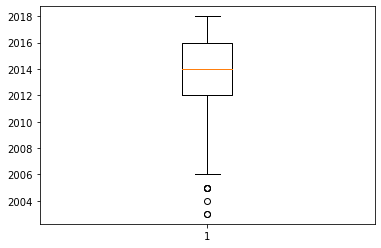

In [31]:
plt.boxplot(cars['Year'])

(array([  3.,   4.,   6.,   7.,  21.,  19.,  56.,  38., 111.,  36.]),
 array([2003. , 2004.5, 2006. , 2007.5, 2009. , 2010.5, 2012. , 2013.5,
        2015. , 2016.5, 2018. ]),
 <BarContainer object of 10 artists>)

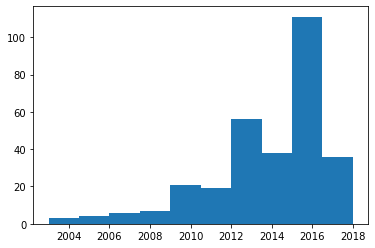

In [32]:
plt.hist(cars['Year'])

- There are some outliers that can be deleted. We can filter the records where the year is earlier than 2006.

In [33]:
cars[cars['Year'] < 2006]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,Age
37,800,2003,350,2280,127000,Petrol,Individual,Manual,0,0,0,1,0,1,0,1,Old
39,sx4,2003,2250,7980,62000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,Old
54,innova,2005,2750,10210,90000,Petrol,Individual,Manual,0,0,0,1,0,1,0,1,Old
77,corolla,2004,1500,12350,135154,Petrol,Dealer,Automatic,0,0,0,1,1,0,1,0,Old
84,innova,2005,3490,13460,197176,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,Old
92,innova,2005,3510,13700,75000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,Old
189,Hero Super Splendor,2005,200,570,55000,Petrol,Individual,Manual,0,0,0,1,0,1,0,1,Old


In [34]:
#Dropping the records
cars2 = cars.drop([37,39,54,77,84,92,189], axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x208e6ed2370>,
 'caps': [<matplotlib.lines.Line2D at 0x208e6ed2a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x208e6ec2fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x208e6ede130>],
 'fliers': [<matplotlib.lines.Line2D at 0x208e6ede490>],
 'means': []}

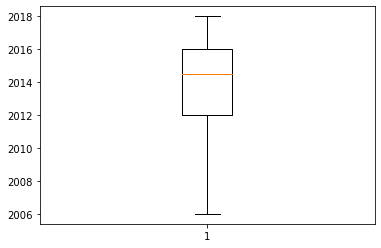

In [35]:
#Checking if all outliers were deleted
plt.boxplot(cars2['Year'])

In [36]:
cars2['Selling_Price'].aggregate(['min','max','median','mean'])

min         100.000000
max       35000.000000
median     3775.000000
mean       4724.489796
Name: Selling_Price, dtype: float64

- The selling price can vary from 100 to 35000. The average selling price is 4724 and the median is 3775.

{'whiskers': [<matplotlib.lines.Line2D at 0x208e6f35370>,
 'caps': [<matplotlib.lines.Line2D at 0x208e6f35a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x208e6f28fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x208e6f42130>],
 'fliers': [<matplotlib.lines.Line2D at 0x208e6f42490>],
 'means': []}

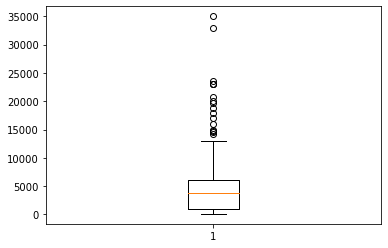

In [37]:
plt.boxplot(cars2['Selling_Price'])

(array([143.,  91.,  34.,   9.,   6.,   5.,   4.,   0.,   0.,   2.]),
 array([  100.,  3590.,  7080., 10570., 14060., 17550., 21040., 24530.,
        28020., 31510., 35000.]),
 <BarContainer object of 10 artists>)

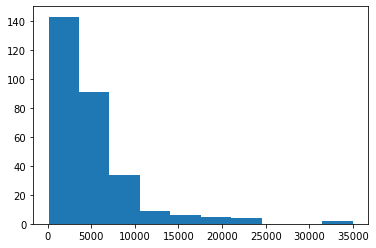

In [38]:
plt.hist(cars2['Selling_Price'])

- There are some outliers to be deleted. We will filter by selling price greater than 14000.

In [39]:
cars2[cars2['Selling_Price'] > 14000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,Age
50,fortuner,2012,14900,30610,104707,Diesel,Dealer,Automatic,0,0,1,0,1,0,1,0,Old
51,fortuner,2015,23000,30610,40000,Diesel,Dealer,Automatic,0,0,1,0,1,0,1,0,New
52,innova,2017,18000,19770,15000,Diesel,Dealer,Automatic,0,0,1,0,1,0,1,0,New
53,fortuner,2013,16000,30610,135000,Diesel,Individual,Automatic,0,0,1,0,1,0,0,1,New
59,fortuner,2014,19990,35960,41000,Diesel,Dealer,Automatic,0,0,1,0,1,0,1,0,New
62,fortuner,2014,18750,35960,78000,Diesel,Dealer,Automatic,0,0,1,0,1,0,1,0,New
63,fortuner,2015,23500,35960,47000,Diesel,Dealer,Automatic,0,0,1,0,1,0,1,0,New
64,fortuner,2017,33000,36230,6000,Diesel,Dealer,Automatic,0,0,1,0,1,0,1,0,New
66,innova,2017,19750,23150,11000,Petrol,Dealer,Automatic,0,0,0,1,1,0,1,0,New
69,corolla altis,2016,14250,20910,12000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,New


In [40]:
cars3 = cars2.drop([50, 51, 52, 53, 59, 62, 63, 64, 66, 69, 79, 80, 82, 86, 93, 96, 97], axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x208e7019160>,
 'caps': [<matplotlib.lines.Line2D at 0x208e7019820>,
 'boxes': [<matplotlib.lines.Line2D at 0x208e7009dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x208e7019ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x208e7026280>],
 'means': []}

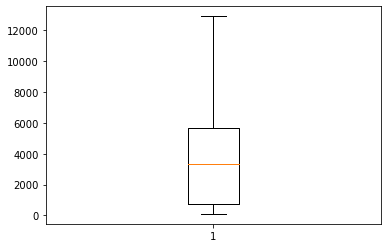

In [41]:
#Checking if the outliers were dropped
plt.boxplot(cars3['Selling_Price'])

In [42]:
cars3['Present_Price'].aggregate(['min','max','median','mean'])

min         320.000000
max       23730.000000
median     5800.000000
mean       6128.949458
Name: Present_Price, dtype: float64

- The present price vary from 320 to 23730, the average price is 6129.

{'whiskers': [<matplotlib.lines.Line2D at 0x208e706ffa0>,
 'caps': [<matplotlib.lines.Line2D at 0x208e707c6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x208e706fc40>],
 'medians': [<matplotlib.lines.Line2D at 0x208e707cd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x208e7088130>],
 'means': []}

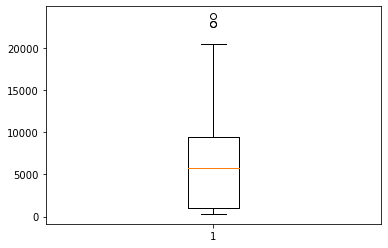

In [43]:
plt.boxplot(cars3['Present_Price'])

(array([99., 25., 50., 46., 20., 21.,  5.,  6.,  2.,  3.]),
 array([  320.,  2661.,  5002.,  7343.,  9684., 12025., 14366., 16707.,
        19048., 21389., 23730.]),
 <BarContainer object of 10 artists>)

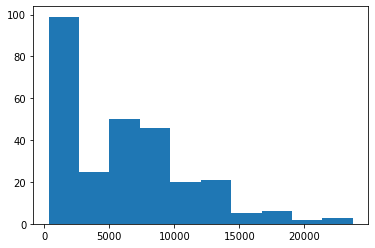

In [44]:
plt.hist(cars3['Present_Price'])

In [45]:
#Filtering the records where present price is greater than 21000 to drop the outliers.
cars3[cars3['Present_Price'] > 21000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,Age
78,corolla altis,2010,5250,22830,80000,Petrol,Dealer,Automatic,0,0,0,1,1,0,1,0,Old
85,camry,2006,2500,23730,142000,Petrol,Individual,Automatic,3,0,0,1,1,0,0,1,Old
94,corolla altis,2008,4000,22780,89000,Petrol,Dealer,Automatic,0,0,0,1,1,0,1,0,Old


In [46]:
cars4 = cars3.drop([78, 85, 94], axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x208e7148370>,
 'caps': [<matplotlib.lines.Line2D at 0x208e7148a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x208e7148070>],
 'medians': [<matplotlib.lines.Line2D at 0x208e7153130>],
 'fliers': [<matplotlib.lines.Line2D at 0x208e7153490>],
 'means': []}

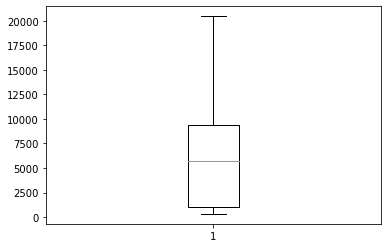

In [47]:
plt.boxplot(cars4['Present_Price'])

In [48]:
cars4['Kms_Driven'].aggregate(['min','max','median','mean'])

min          500.000000
max       500000.000000
median     30876.500000
mean       33928.364964
Name: Kms_Driven, dtype: float64

- The kms driven vary from 500 to 500000. The average value is 33928.

{'whiskers': [<matplotlib.lines.Line2D at 0x208e71a5ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x208e71b43a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x208e71a5940>],
 'medians': [<matplotlib.lines.Line2D at 0x208e71b4a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x208e71b4dc0>],
 'means': []}

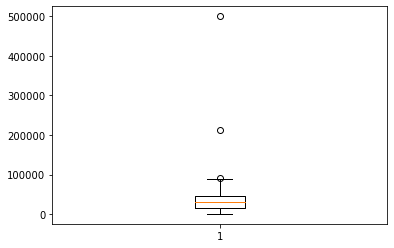

In [49]:
plt.boxplot(cars4['Kms_Driven'])

(array([224.,  48.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([   500.,  50450., 100400., 150350., 200300., 250250., 300200.,
        350150., 400100., 450050., 500000.]),
 <BarContainer object of 10 artists>)

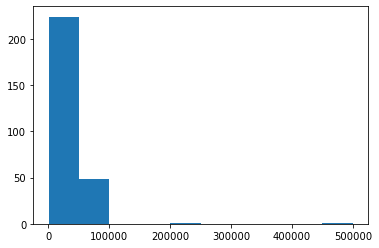

In [50]:
plt.hist(cars4['Kms_Driven'])

In [51]:
#Filtering the records to drop the outliers.
cars4[cars4['Kms_Driven'] > 90000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,Age
179,Honda Karizma,2010,310,1050,213000,Petrol,Individual,Manual,0,0,0,1,0,1,0,1,Old
196,Activa 3g,2008,170,520,500000,Petrol,Individual,Automatic,0,0,0,1,1,0,0,1,Old
200,Bajaj Pulsar 150,2006,100,750,92233,Petrol,Individual,Manual,0,0,0,1,0,1,0,1,Old


In [52]:
cars5 = cars4.drop([179,196,200], axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x208e727e4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x208e727eb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x208e727e160>],
 'medians': [<matplotlib.lines.Line2D at 0x208e7289280>],
 'fliers': [<matplotlib.lines.Line2D at 0x208e72895e0>],
 'means': []}

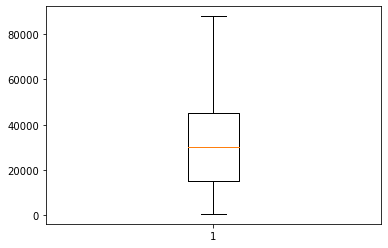

In [53]:
plt.boxplot(cars5['Kms_Driven'])

In [54]:

cars5.groupby(['Year'])[['Selling_Price','Present_Price']].mean()

,Selling_Price,Present_Price
Year,,
2006,1575.000000,5875.000000
2007,160.000000,665.000000
2008,570.000000,2003.400000
2009,2816.666667,10601.666667
2010,3198.333333,8206.666667
2011,2375.263158,5148.052632
2012,2807.142857,5830.000000
2013,3151.562500,6077.718750
2014,3950.555556,6275.638889


In [55]:
cars5.groupby(['Transmission'])[['Selling_Price','Present_Price']].mean()

,Selling_Price,Present_Price
Transmission,,
Automatic,4329.090909,6343.181818
Manual,3744.216867,5969.915663


- Automatic cars on average have higher selling price and present price.

In [56]:
cars5.groupby(['Seller_Type'])[['Selling_Price','Present_Price']].mean()

,Selling_Price,Present_Price
Seller_Type,,
Dealer,5535.317919,8800.225434
Individual,713.673469,1057.346939


- Cars sold by dealers have higher selling and present prices.

In [57]:
cars5['Loss_percent'] = (cars['Present_Price']-cars['Selling_Price'])/cars['Present_Price']

In [58]:
cars5.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,Age,Loss_percent
0,ritz,2014,3350,5590,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,New,0.400716
1,sx4,2013,4750,9540,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,New,0.502096
2,ciaz,2017,7250,9850,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,New,0.263959
3,wagon r,2011,2850,4150,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,Old,0.313253
4,swift,2014,4600,6870,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,New,0.330422


- We can create a new column to calculate the percentage loss of car prices from the present and selling prices.

In [59]:
cars5.groupby(['Year'])['Loss_percent'].mean()

Year
2006    0.735336
2007    0.763218
2008    0.688422
2009    0.687592
2010    0.588795
2011    0.508444
2012    0.490838
2013    0.430077
2014    0.379637
2015    0.277756
2016    0.215384
2017    0.124814
2018    0.059003
Name: Loss_percent, dtype: float64

- The loss percent tends to decrease as the year increases.

In [60]:
cars5.groupby(['Transmission'])['Loss_percent'].mean()

Transmission
Automatic    0.295531
Manual       0.355672
Name: Loss_percent, dtype: float64

- The loss percent of manual cars is slightly higher than automatic cars on average.

In [61]:
cars5.groupby(['Seller_Type'])['Loss_percent'].mean()

Seller_Type
Dealer        0.353000
Individual    0.346888
Name: Loss_percent, dtype: float64

- The loss percent for dealer and individual is similar.

In [62]:
cars5.groupby(['Fuel_Type'])['Loss_percent'].mean()

Fuel_Type
CNG       0.490178
Diesel    0.313533
Petrol    0.357030
Name: Loss_percent, dtype: float64

In [63]:
cars5.groupby(['Age'])['Loss_percent'].mean()

Age
New    0.281695
Old    0.561169
Name: Loss_percent, dtype: float64

- The loss percent of old cars is higher than new cars as expected.

In [64]:
cars5.groupby(['Transmission','Age'])['Loss_percent'].mean()

Transmission  Age
Automatic     New    0.233453
              Old    0.574880
Manual        New    0.286363
              Old    0.560299
Name: Loss_percent, dtype: float64

- It seems that the age influences the loss percent more than the transmission type.

In [65]:
cars5.groupby(['Transmission','Age','Fuel_Type'])['Loss_percent'].mean()

Transmission  Age  Fuel_Type
Automatic     New  Petrol       0.233453
              Old  Petrol       0.574880
Manual        New  CNG          0.361493
                   Diesel       0.263786
                   Petrol       0.291314
              Old  CNG          0.618863
                   Diesel       0.512521
                   Petrol       0.567307
Name: Loss_percent, dtype: float64

In [66]:
bins = [0,20000,40000,60000,80000]
bin_labels = ['0-20000','20000-40000','40000-60000', '60000-80000']
cars5['Kms_Driven_group'] = pd.cut(cars5['Kms_Driven'], bins, right=False, labels = bin_labels)

In [67]:
cars5.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,Age,Loss_percent,Kms_Driven_group
0,ritz,2014,3350,5590,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,New,0.400716,20000-40000
1,sx4,2013,4750,9540,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,New,0.502096,40000-60000
2,ciaz,2017,7250,9850,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,New,0.263959,0-20000
3,wagon r,2011,2850,4150,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,Old,0.313253,0-20000
4,swift,2014,4600,6870,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,New,0.330422,40000-60000


- We can create bins for the kms driven so it is easier to explore the data.

In [68]:
cars5.groupby(['Age','Kms_Driven_group'])['Loss_percent'].mean()

Age  Kms_Driven_group
New  0-20000             0.206725
     20000-40000         0.306047
     40000-60000         0.366419
     60000-80000         0.357370
Old  0-20000             0.427974
     20000-40000         0.546091
     40000-60000         0.571543
     60000-80000         0.634576
Name: Loss_percent, dtype: float64

- The loss percent generally tends to increase as the kms driven increase.

In [69]:
cars5[['Year','Kms_Driven','Selling_Price','Present_Price']].corr()

,Year,Kms_Driven,Selling_Price,Present_Price
Year,1.000000,-0.533589,0.260426,-0.041684
Kms_Driven,-0.533589,1.000000,0.194506,0.434094
Selling_Price,0.260426,0.194506,1.000000,0.868991
Present_Price,-0.041684,0.434094,0.868991,1.000000


- We can see that there is correlation between the selling and the present price. But it seems that the correlation between the selling price and the year and kms driven. The correlation between other variables seems weak as well.

In [70]:
cars5[['Year','Kms_Driven','Loss_percent']].corr()

,Year,Kms_Driven,Loss_percent
Year,1.000000,-0.533589,-0.823928
Kms_Driven,-0.533589,1.000000,0.557305
Loss_percent,-0.823928,0.557305,1.000000


- We can see that there is a better correlation between variables when we analize the loss percent.

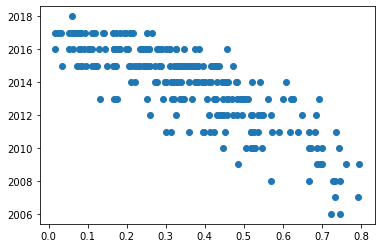

In [71]:
plt.scatter(cars5['Loss_percent'],cars5['Year'])

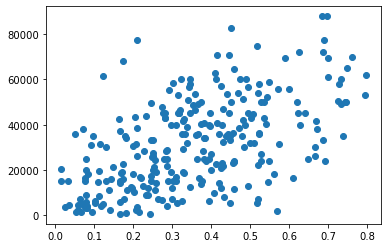

In [72]:
plt.scatter(cars5['Loss_percent'],cars5['Kms_Driven'])

- The points are a bit spread out in the scatter plot, but it looks like the year and loss percent have a negative correlation.

In [73]:
cars5.groupby(['Age','Kms_Driven_group','Transmission'])['Loss_percent'].mean()

Age  Kms_Driven_group  Transmission
New  0-20000           Automatic       0.207060
                       Manual          0.206685
     20000-40000       Automatic       0.263160
                       Manual          0.312174
     40000-60000       Automatic       0.233333
                       Manual          0.369444
     60000-80000       Automatic            NaN
                       Manual          0.357370
Old  0-20000           Automatic       0.568966
                       Manual          0.410351
     20000-40000       Automatic       0.519231
                       Manual          0.547671
     40000-60000       Automatic       0.450687
                       Manual          0.576579
     60000-80000       Automatic       0.760638
                       Manual          0.624071
Name: Loss_percent, dtype: float64

- As seen before, manual cars usually have high percent loss than automatic cars, and old cars have high percent loss than new cars.

In [74]:
cars5.groupby(['Age','Kms_Driven_group','Seller_Type'])['Loss_percent'].mean()

Age  Kms_Driven_group  Seller_Type
New  0-20000           Dealer         0.191488
                       Individual     0.218152
     20000-40000       Dealer         0.266575
                       Individual     0.386870
     40000-60000       Dealer         0.361811
                       Individual     0.403279
     60000-80000       Dealer         0.357370
                       Individual          NaN
Old  0-20000           Dealer         0.313253
                       Individual     0.442315
     20000-40000       Dealer         0.485220
                       Individual     0.622179
     40000-60000       Dealer         0.554187
                       Individual     0.640966
     60000-80000       Dealer         0.658723
                       Individual     0.554084
Name: Loss_percent, dtype: float64

- Cars sold by individuals usually have higher percent loss than the cars sold by dealers.

In [75]:
cars5.groupby(['Age','Kms_Driven_group','Fuel_Type'])['Loss_percent'].mean()

Age  Kms_Driven_group  Fuel_Type
New  0-20000           CNG               NaN
                       Diesel       0.083568
                       Petrol       0.211286
     20000-40000       CNG          0.361493
                       Diesel       0.150412
                       Petrol       0.324511
     40000-60000       CNG               NaN
                       Diesel       0.319081
                       Petrol       0.401012
     60000-80000       CNG               NaN
                       Diesel       0.279814
                       Petrol       0.473703
Old  0-20000           CNG               NaN
                       Diesel            NaN
                       Petrol       0.427974
     20000-40000       CNG               NaN
                       Diesel       0.430851
                       Petrol       0.552870
     40000-60000       CNG          0.618863
                       Diesel       0.543604
                       Petrol       0.578227
     60000-80000      

- Petrol cars tend to have higher percent loss than manual cars.

In [76]:
cars_analysis = cars5.groupby(['Age','Kms_Driven_group'])['Selling_Price'].mean().unstack()

<AxesSubplot:xlabel='Age'>

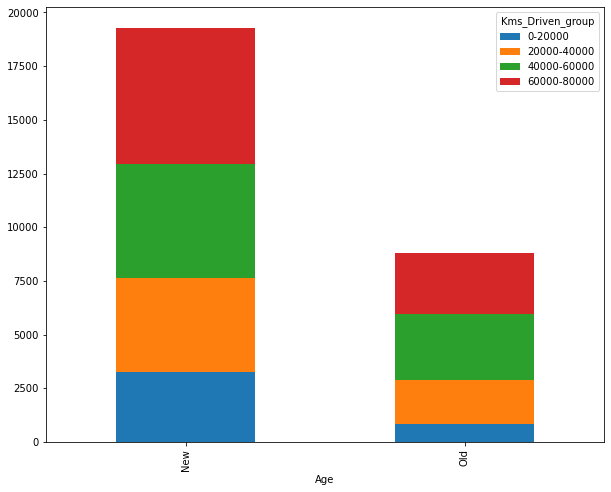

In [77]:
cars_analysis.plot(kind='bar', stacked=True, figsize=(10,8))

- From the exploratory analysis above, we know that the selling price is influenced mostly by the present price. The loss percent is influenced by the year and kms driven. Cars sold by individuals and petrol cars also tend to have higher percent loss than cars sold by dealers and diesel cars, respectively.
- Therefore, we can start the analysis testing the model to predict the selling price and the loss percent based on the present price, year and kms_driven.

## Linear Regression Model

In [78]:
results=ols("Selling_Price ~ Year + Kms_Driven + Present_Price",data=cars5).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     484.8
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.06e-107
Time:                        18:36:16   Log-Likelihood:                -2308.2
No. Observations:                 271   AIC:                             4624.
Df Residuals:                     267   BIC:                             4639.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.926e+05   7.58e+04     -9.133

- We can see that the R-squared is strong at 0.845. This means the model is good at predicting the selling price of cars based on the year, kms driven and present price.
- Analyzing the std err, we can see that the model was not so accurate in predicting the intercept and year coefficients compared to the other coefficients.
- Analyzing the p-value and noting that we can reject the null hypothesis if this value is less than 0.05, we can see that we cannot reject the null hypothesis for the kms driven.
- The prob(f-statistic) value is less than 0.05, therefore the model is statistically significant.
- The coef for the variables represent how many units of selling_price increase as one unit of the given variable increase. We can see that the year is the variable that most influences the selling price.

In [79]:
#Analyzing the loss percent
results=ols("Loss_percent ~ Year + Kms_Driven",data=cars5).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Loss_percent   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     310.0
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           1.90e-70
Time:                        18:36:17   Log-Likelihood:                 234.57
No. Observations:                 271   AIC:                            -463.1
Df Residuals:                     268   BIC:                            -452.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    114.6521      6.169     18.584      0.0

- We can see that the R-squared is moderate at 0.698. But the model was more accurate in predicting the coefficients than the model above. Additionally, all p-values are zero and we can reject the null hypothesis

- We left some variables out of the model, so we can expect that it is possible to achieve a higher R2 value by adding some of the dummy variables. From the data exploration, we can see that the transmission and fuel type also affect the selling price and loss percent. Adding the respective dummy variables:

In [80]:
results = ols("Loss_percent ~ Year + Kms_Driven + Automatic + Manual + CNG + Diesel + Petrol", data=cars5).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Loss_percent   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     136.7
Date:                Mon, 13 Dec 2021   Prob (F-statistic):           3.03e-71
Time:                        18:36:17   Log-Likelihood:                 245.01
No. Observations:                 271   AIC:                            -478.0
Df Residuals:                     265   BIC:                            -456.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.7770      3.369     17.447      0.0

In [81]:
results = ols("Selling_Price ~ Present_Price + Year + Kms_Driven + Automatic + Manual + CNG + Diesel + Petrol", data=cars5).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     281.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.20e-111
Time:                        18:36:17   Log-Likelihood:                -2289.5
No. Observations:                 271   AIC:                             4593.
Df Residuals:                     264   BIC:                             4618.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.305e+05   3.96e+04     -8.345

- We can see that both R-square were slightly improved.